## A Simple Recommender

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_csv('ratings.dat', sep='::',
                 names=['user_id','movie_id','rating','titmestamp'])

In [5]:
df['user_id']=df['user_id'].apply(lambda x: str(x).zfill(5))
df['movie_id']=df['movie_id'].apply(lambda x: str(x).zfill(5))

In [6]:
df.head()

,user_id,movie_id,rating,titmestamp
0,00001,01193,5,978300760
1,00001,00661,3,978302109
2,00001,00914,3,978301968
3,00001,03408,4,978300275
4,00001,02355,5,978824291


Load in the movie titles and merge it with this dataset

In [7]:
with open('movies.dat', 'rb') as f:
    content = f.readlines()

In [8]:
movies = []
for a_line in content:
    movies.append(str(a_line).replace('b','').replace('\\n','').replace('"','').replace("'",'').split('::'))
movies = pd.DataFrame(movies,columns=['movie_id','movie_title','genres'])

In [9]:
movies['movie_id'] = movies['movie_id'].apply(lambda x: str(x).zfill(5))

In [10]:
movies.head()

,movie_id,movie_title,genres
0,00001,Toy Story (1995),Animation|Childrens|Comedy
1,00002,Jumanji (1995),Adventure|Childrens|Fantasy
2,00003,Grumpier Old Men (1995),Comedy|Romance
3,00004,Waiting to Exhale (1995),Comedy|Drama
4,00005,Father of the Bride Part II (1995),Comedy


Since the movie_id columns are the same we can merge these datasets on this column.

In [11]:
df = pd.merge(df, movies, on='movie_id')
df.sample(10)

,user_id,movie_id,rating,titmestamp,movie_title,genres
614199,03361,00553,5,967685733,Tomstone (1993),Western
629807,05504,00164,4,959737272,Devil in a Blue Dress (1995),Crime|Film-Noir|Mystery|Thriller
560945,03292,00246,4,968100980,Hoop Dreams (1994),Documentary
724611,05786,02792,2,958268312,Airplane II: The Sequel (1982),Comedy
436581,05857,02138,3,957723587,Watership Down (1978),Animation|Childrens|Drama|Fantasy
184149,03840,01641,5,1046110878,"Full Monty, The (1997)",Comedy
131904,03507,01552,1,967067366,Con Air (1997),Action|Adventure|Thriller
93,00326,01193,3,976422054,One Flew Over the Cuckoos Nest (1975),Drama
927144,05765,01858,4,958181237,Mr. Nice Guy (1997),Action|Comedy
442085,04601,01918,3,964206721,Lethal Weapon 4 (1998),Action|Comedy|Crime|Drama


In [12]:
df.describe()

,rating,titmestamp
count,"1,000,209.00","1,000,209.00"
mean,3.58,"972,243,695.40"
std,1.12,"12,152,558.94"
min,1.00,"956,703,932.00"
25%,3.00,"965,302,637.00"
50%,4.00,"973,018,006.00"
75%,4.00,"975,220,939.00"
max,5.00,"1,046,454,590.00"


We can tell that the average rating is 3.58 and the max is 5. We also see that the dataset has 1,000,209 records.

Let’s now create a dataframe with the average rating for each movie and the number of ratings. 

In [13]:
ratings = pd.DataFrame(df.groupby('movie_title')['rating'].mean())
ratings['number_of_ratings'] = df.groupby('movie_title')['rating'].count()
ratings.sample(10)

,rating,number_of_ratings
movie_title,,
"Mummy, The (1932)",3.54,162
Kull the Conqueror (1997),2.34,109
Mute Witness (1994),3.48,29
Rising Sun (1993),3.18,382
Squanto: A Warriors Tale (1994),3.53,15
Guys and Dolls (1955),3.79,260
"Graduate, The (1967)",4.25,1261
"Naked Gun 2 1/2: The Smell of Fear, The (1991)",3.09,431
Sleepy Hollow (1999),3.52,1066


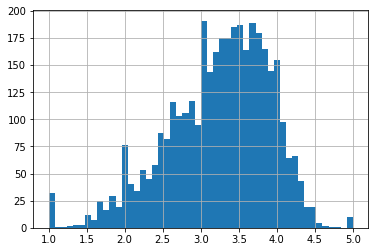

In [14]:
ratings['rating'].hist(bins=50)

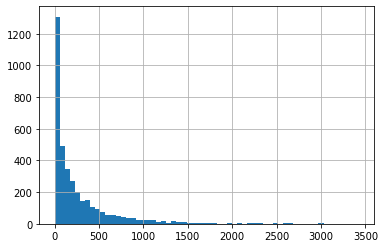

In [15]:
ratings['number_of_ratings'].hist(bins=60)

From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous.

Let’s now check the relationship between the rating of a movie and the number of ratings.

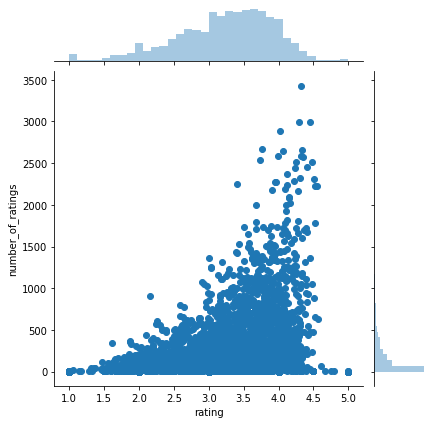

In [16]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

The graph indicates that the more the ratings a movie gets the higher the average rating it gets. 

In [17]:
movie_matrix = df.pivot_table(index='user_id', columns='movie_title', values='rating')
movie_matrix.sample(10)

movie_title,"$1,000,000 Duck (1971)",...And Justice for All (1979),1-900 (1994),10 Things I Hate Aout You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),...,Young and Innocent (1937),Your Friends and Neighors (1998),Youve Got Mail (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj\xe6rlighetens kj\xf8tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999),"urs, The (1989)"
user_id,,,,,,,,,,,,,,,,,,,,,
01279,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,3.00,nan,nan,nan,nan,nan,5.00,nan
03614,nan,nan,nan,3.00,nan,nan,nan,5.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
00110,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
02868,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
01119,nan,4.00,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
01961,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
02882,nan,nan,nan,3.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
03889,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
05260,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


The rating appear as NAN where a user didn't rate a certain movie. 

To view the top 10 rated movies

In [18]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
movie_title,,
American Beauty (1999),4.32,3428
Star Wars: Episode IV - A New Hope (1977),4.45,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.29,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.02,2883
Jurassic Park (1993),3.76,2672
Saving Private Ryan (1998),4.34,2653
Terminator 2: Judgment Day (1991),4.06,2649
"Matrix, The (1999)",4.32,2590
Back to the Future (1985),3.99,2583


Let’s assume that a user has watched Air Force One (1997) and Contact (1997). We would like like to recommend movies to this user based on this watching history. 

In [19]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [24]:
AFO_user_rating.sort_values(ascending=False)[:10]

user_id
06033   5.00
00605   5.00
02896   5.00
02909   5.00
01499   5.00
00543   5.00
01472   5.00
00552   5.00
02997   5.00
04746   5.00
Name: Air Force One (1997), dtype: float64

In [25]:
contact_user_rating.sort_values(ascending=False)[:10]

user_id
00009   5.00
01137   5.00
04782   5.00
02599   5.00
01241   5.00
04788   5.00
01230   5.00
01221   5.00
04808   5.00
01215   5.00
Name: Contact (1997), dtype: float64

In [26]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)

We can see that the correlation between Air Force One movie and Til There Was You (1997) is 0.867. This indicates a very strong similarity between these two movies.

In [31]:
similar_to_air_force_one.sort_values(ascending=False)[:10]

movie_title
Cavalcade (1933)             1.00
I Got the Hook Up (1998)     1.00
War at Home, The (1996)      1.00
Race the Sun (1996)          1.00
Little Men (1998)            1.00
Air Force One (1997)         1.00
Alarmist, The (1997)         1.00
Trick or Treat (1986)        1.00
Mummys Ghost, The (1944)     1.00
Celestial Clockwork (1994)   1.00
dtype: float64

Let’s compute the correlation between Contact (1997) ratings and the rest of the movies ratings.

In [32]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [33]:
similar_to_contact.sort_values(ascending=False)[:10]

movie_title
Contact (1997)                                     1.00
Gold Diggers: The Secret of Bear Mountain (1995)   1.00
Butterfly Kiss (1995)                              1.00
Santitos (1997)                                    1.00
Federal Hill (1994)                                1.00
See the Sea (Regarde la mer) (1997)                1.00
Last Time I Saw Paris, The (1954)                  1.00
Lamerica (1994)                                    1.00
Better Living (1998)                               1.00
In Gods Hands (1998)                               1.00
dtype: float64

In [38]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.sort_values(by='Correlation',ascending=False)[:10]

,Correlation
movie_title,
Federal Hill (1994),1.00
Better Living (1998),1.00
Butterfly Kiss (1995),1.00
All Things Fair (1996),1.00
Santitos (1997),1.00
In Gods Hands (1998),1.00
"Last Time I Saw Paris, The (1954)",1.00
Little Men (1998),1.00
Gold Diggers: The Secret of Bear Mountain (1995),1.00


In [39]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['Correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.sort_values(by='Correlation',ascending=False)[:10]

,Correlation
movie_title,
Air Force One (1997),1.00
Trick or Treat (1986),1.00
Cavalcade (1933),1.00
Little Men (1998),1.00
I Got the Hook Up (1998),1.00
"War at Home, The (1996)",1.00
"Alarmist, The (1997)",1.00
Power 98 (1995),1.00
"Mummys Ghost, The (1944)",1.00


These two dataframes above show us the movies that are most similar to Contact (1997) and Air Force One (1997) movies respectively. 

However we have a challenge in that some of the movies have very few ratings and may end up being recommended simply because one or two people gave them a 5 star rating. We can fix this by setting a threshold for the number of ratings.

From the histogram earlier we saw a sharp decline in number of ratings from 100. We shall therefore set this as the threshold

In [99]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])

In [100]:
corr_AFO.sample(10)

,correlation,number_of_ratings
movie_title,,
Carnosaur 2 (1995),-0.33,26
Fierce Creatures (1997),0.25,168
"Portrait of a Lady, The (1996)",-0.16,43
Sgt. Bilko (1996),0.26,140
Mister Roerts (1955),0.13,421
Blackmail (1929),-0.23,11
"Thin Line Between Love and Hate, A (1996)",0.55,19
"Henry: Portrait of a Serial Killer, Part 2 (1996)",0.84,20
Crime and Punishment in Suuria (2000),-0.17,33


In [101]:
corr_contact.sample(10)

,Correlation,number_of_ratings
movie_title,,
Freejack (1992),0.21,304
Sid and Nancy (1986),0.01,304
"Saint of Fort Washington, The (1993)",0.43,21
Mumford (1999),0.23,277
Starman (1984),0.27,865
How to Be a Player (1997),0.18,84
Aott and Costello Meet Frankenstein (1948),0.15,206
Dick Tracy (1990),0.20,624
Hellound: Hellraiser II (1988),0.02,167


We shall now obtain the movies that are most similar to Air Force One (1997) by limiting them to movies that have at least 100 reviews. We then sort them by the correlation column and view the first 10.

In [112]:
c1 = corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False)
c1.head(10)

,correlation,number_of_ratings
movie_title,,
Air Force One (1997),1.00,1076
Major League: Back to the Minors (1998),0.53,142
Monkey Shines (1988),0.53,161
Fear (1996),0.51,128
True Crime (1995),0.51,135
"Next Best Thing, The (2000)",0.50,160
Asolute Power (1997),0.50,380
"Little Rascals, The (1994)",0.50,107
Up Close and Personal (1996),0.48,139


Let’s do the same for Contact (1997) movie and see the movies that are most correlated to it.

In [113]:
c2 = corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False)
c2.head(10)

,Correlation,number_of_ratings
movie_title,,
Contact (1997),1.00,1382
Girlfight (2000),0.59,127
Pollyanna (1960),0.50,136
Houseguest (1994),0.48,138
Nell (1994),0.48,215
Desperate Measures (1998),0.47,111
Swing Kids (1993),0.47,185
"Big One, The (1997)",0.46,102
Party Girl (1995),0.45,105


In [118]:
c = pd.merge(c1,c2,left_index=True,right_index=True)

In [120]:
c['Score'] = (c['Correlation']*c['number_of_ratings_x'] + c['Correlation']*c['number_of_ratings_y'])/(c['number_of_ratings_x']+c['number_of_ratings_y'])

In [123]:
c.sort_values(by=['Score'], ascending=False).head(10)

,correlation,number_of_ratings_x,Correlation,number_of_ratings_y,Score
movie_title,,,,,
Air Force One (1997),1.00,1076,0.18,1076,0.59
Contact (1997),0.18,1382,1.00,1382,0.59
Up Close and Personal (1996),0.48,139,0.42,139,0.45
Pollyanna (1960),0.37,136,0.50,136,0.43
Asolute Power (1997),0.50,380,0.36,380,0.43
Missing in Action 2: The Beginning (1985),0.41,104,0.44,104,0.42
True Crime (1995),0.51,135,0.34,135,0.42
"Next Best Thing, The (2000)",0.50,160,0.34,160,0.42
Fear (1996),0.51,128,0.31,128,0.41
